In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
filter_routes = pd.read_csv("routes_near_all_stations.csv")
all_routes = pd.read_csv("../data/brushing_data.csv")
stations = pd.read_csv("PM10_PM25_ylityspäivät_2024.csv")
filter_stations = stations[stations['Mittauspaikka'].isin(filter_routes['Havaintoaseman nimi'])]

In [36]:
import warnings
warnings.filterwarnings('ignore')
all_routes["endTime"] = pd.to_datetime(all_routes["endTime"])
all_routes["startTime"] = pd.to_datetime(all_routes["startTime"])
filter_routes["endTime"] = pd.to_datetime(filter_routes["endTime"])
filter_routes["startTime"] = pd.to_datetime(filter_routes["startTime"])
stations["Date"] = pd.to_datetime(stations["Päivämäärä"], dayfirst=True)
stations = stations[stations["Komponentti"] == "PM10 24h"]
filter_stations["Date"] = pd.to_datetime(filter_stations["Päivämäärä"], dayfirst=True)
filter_stations = filter_stations[filter_stations["Komponentti"] == "PM10 24h"]

In [37]:
idx = pd.date_range('03-01-2024', '06-04-2024')
#Harjaus
duration_hours = (all_routes["endTime"] - all_routes["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(all_routes['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(all_routes['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(all_routes['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()
duration_by_day = duration_by_day.reindex(idx, fill_value=0)
duration_by_hour = duration_by_hour.reindex(idx, fill_value=0)

#Suodatettu harjaus
filter_duration_hours = (filter_routes["endTime"] - filter_routes["startTime"]).dt.total_seconds() / 3600

filter_duration_by_day = filter_duration_hours.groupby(filter_routes['endTime'].dt.to_period('d')).sum()
filter_duration_by_hour = filter_duration_hours.groupby(filter_routes['endTime'].dt.to_period('h')).sum()

filter_durations = filter_duration_hours.groupby(filter_routes['endTime']).sum()
filter_duration_by_day.index = filter_duration_by_day.index.to_timestamp()
filter_duration_by_hour.index = filter_duration_by_hour.index.to_timestamp()
filter_duration_by_day = filter_duration_by_day.reindex(idx, fill_value=0)
filter_duration_by_hour = filter_duration_by_hour.reindex(idx, fill_value=0)

#Asemat
day_counts = stations.value_counts("Date").sort_index()
day_counts.index = pd.DatetimeIndex(day_counts.index)
day_counts = day_counts.reindex(idx, fill_value=0)


#Suodatetut asemat
filter_day_counts = filter_stations.value_counts("Date").sort_index()
filter_day_counts.index = pd.DatetimeIndex(filter_day_counts.index)
filter_day_counts = filter_day_counts.reindex(idx, fill_value=0)

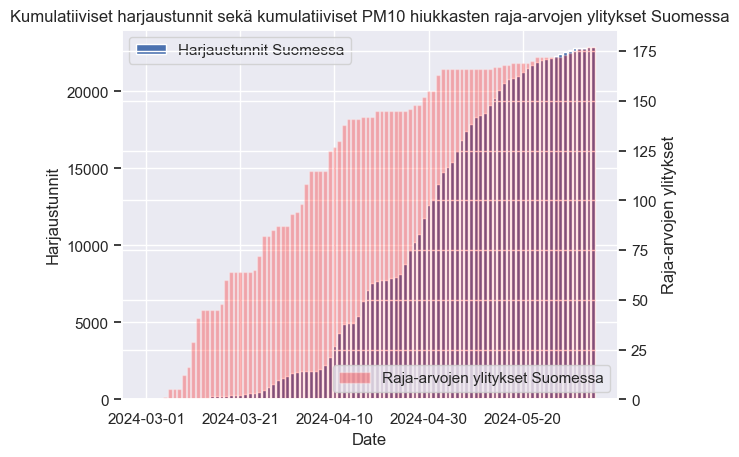

In [51]:
#Kumulatiiviset kuvaajat

sns.set_theme()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

duration_cumulative = duration_by_day.cumsum()
counts_cumulative = day_counts.cumsum()

ax1.bar(duration_cumulative.index, duration_cumulative.values, label="Harjaustunnit Suomessa")
ax2.bar(counts_cumulative.index, counts_cumulative.values, color="red", label="Raja-arvojen ylitykset Suomessa", alpha = 0.3)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
ax2.set_ylabel("Raja-arvojen ylitykset")
ax1.set_ylabel("Harjaustunnit")
xticks = day_counts.index[::20]
ax1.set_xticks(xticks)
ax1.set_xlabel("Date")
plt.title("Kumulatiiviset harjaustunnit sekä kumulatiiviset PM10 hiukkasten raja-arvojen ylitykset Suomessa")
plt.show()

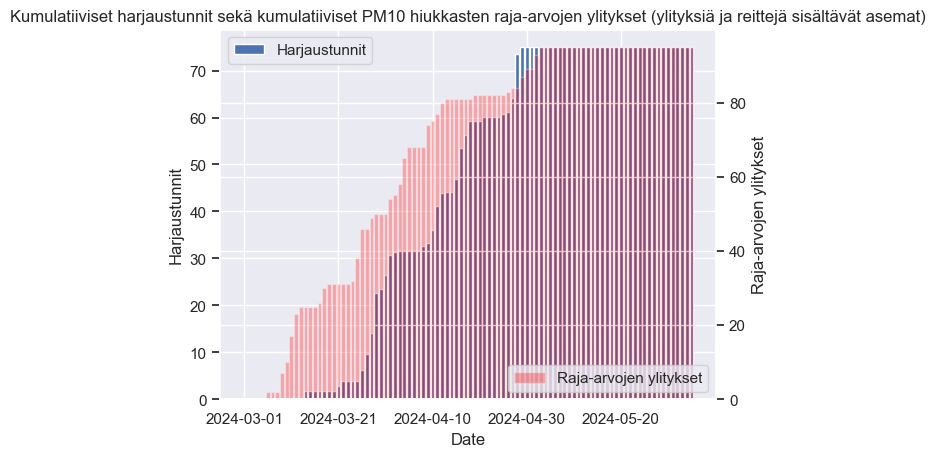

In [50]:
# Sama raja-arvoja ylittäneille asemille, joiden lähellä on reittejä
sns.set_theme()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

duration_cumulative = filter_duration_by_day.cumsum()
counts_cumulative = filter_day_counts.cumsum()

ax1.bar(duration_cumulative.index, duration_cumulative.values, label="Harjaustunnit")
ax2.bar(counts_cumulative.index, counts_cumulative.values, color="red", label="Raja-arvojen ylitykset", alpha = 0.3)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
ax2.set_ylabel("Raja-arvojen ylitykset")
ax1.set_ylabel("Harjaustunnit")
xticks = day_counts.index[::20]
ax1.set_xticks(xticks)
ax1.set_xlabel("Date")
plt.title("Kumulatiiviset harjaustunnit sekä kumulatiiviset PM10 hiukkasten raja-arvojen ylitykset (ylityksiä ja reittejä sisältävät asemat)")
plt.show()

In [40]:
# Kumulatiivisten ylitysten kulmakertoimen korrelaatio kumulatiivisiin harjaustunteihin? 
# Suodata pienhiukkaset pois? 

#Pienhiukkaset pois

PM10 = stations[stations["Komponentti"] == "PM10 24h"]
PM10_day_counts = PM10.value_counts("Date").sort_index()
PM10_day_counts.index = pd.DatetimeIndex(PM10_day_counts.index)
PM10_day_counts = PM10_day_counts.reindex(idx, fill_value=0)

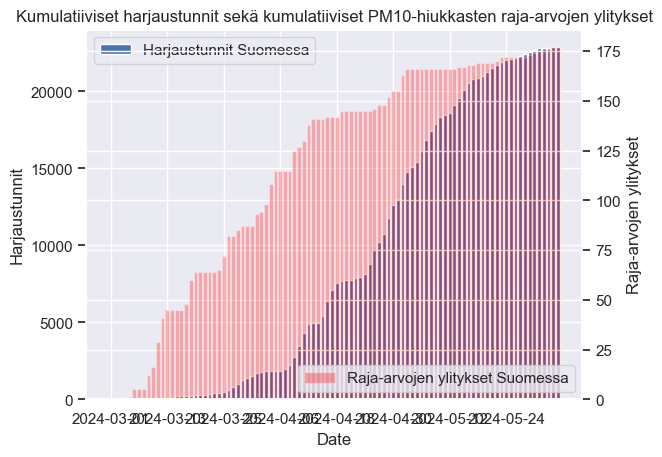

In [41]:
sns.set_theme()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

duration_cumulative = duration_by_day.cumsum()
PM10_counts_cumulative = PM10_day_counts.cumsum()

ax1.bar(duration_cumulative.index, duration_cumulative.values, label="Harjaustunnit Suomessa")
ax2.bar(PM10_counts_cumulative.index, PM10_counts_cumulative.values, color="red", label="Raja-arvojen ylitykset Suomessa", alpha = 0.3)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
ax2.set_ylabel("Raja-arvojen ylitykset")
ax1.set_ylabel("Harjaustunnit")
xticks = PM10_day_counts.index[::12]
ax1.set_xticks(xticks)
ax1.set_xlabel("Date")
plt.title("Kumulatiiviset harjaustunnit sekä kumulatiiviset PM10-hiukkasten raja-arvojen ylitykset")
plt.show()

In [42]:
import numpy as np


increase = pd.DataFrame({"Date": PM10_counts_cumulative.index, "Cumulative": PM10_counts_cumulative.values})

increase["Increase"] = increase["Cumulative"].diff()
increase['Increase'].iloc[0] = 0
# test

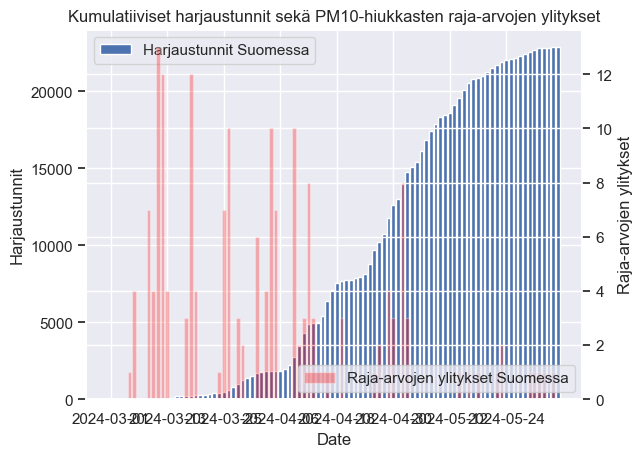

In [43]:
#Laskeva trendi ylitysten määrässä ja tiheydessä harjaustuntien lisääntyessä

sns.set_theme()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.bar(duration_cumulative.index, duration_cumulative.values, label="Harjaustunnit Suomessa")
ax2.bar(increase["Date"], increase["Increase"], color="red", label="Raja-arvojen ylitykset Suomessa", alpha = 0.3)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
ax2.set_ylabel("Raja-arvojen ylitykset")
ax1.set_ylabel("Harjaustunnit")
xticks = PM10_day_counts.index[::12]
ax1.set_xticks(xticks)
ax1.set_xlabel("Date")
plt.title("Kumulatiiviset harjaustunnit sekä PM10-hiukkasten raja-arvojen ylitykset")
plt.show()

In [44]:
# Jako viikkoihin tms. ja trendiviivat kuvaajiin